# ***CODE DEVELOPMENT AND TESTING NOTEBOOK***
Logan Kelsch created on 1/30/2026

#### Testing initial structure of each transformation function

In [6]:
%pip install numba
%pip install pandas
%pip install matplotlib
%pip install bottleneck


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
data = np.random.random((20,2))*2-1
'''
data = np.zeros((20,2))
data2 = np.zeros((20,2))
for i in range(data.shape[0]):
    data[i,0]=(i-10)/2
for i in range(data.shape[0]):
    data[i,1]=(i-5)/5
'''

'\ndata = np.zeros((20,2))\ndata2 = np.zeros((20,2))\nfor i in range(data.shape[0]):\n    data[i,0]=(i-10)/2\nfor i in range(data.shape[0]):\n    data[i,1]=(i-5)/5\n'

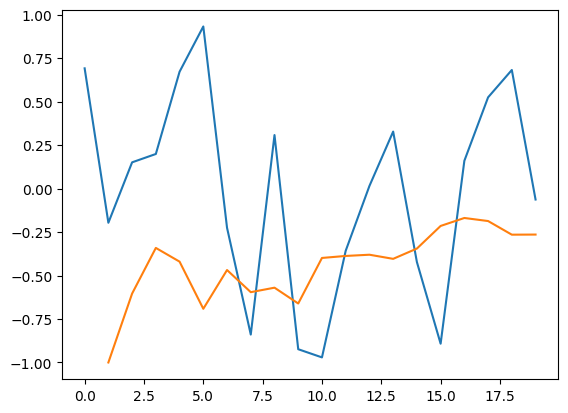

In [8]:
import transform as _T

x = np.zeros(data.shape, dtype=np.float32)
_T.t_COR(data[:,[0]], data[:,[1]], 20, out=x)

#print(x)``
import matplotlib.pyplot as plt

plt.plot(data[:,0])
plt.plot(x[:,0])
plt.show()

#### Constructing Data Structure for holding data points (MEP-ish structure)

In [1]:
#import population as _P

#gene = _P.gene()
#gene.exp = 'F1fdsaklfd'

#print(gene.exp)

In [1]:
import pandas as pd
import numpy as np

import transform as _T
import initialization as _I
import visualization as _V

x_raw = pd.read_csv('../data/spy5m.csv')

#creating initial population
X = _I.Population(
    X_inst=x_raw.values, 
    terminal_idx=[1,2,3,4],
    excluded_idx=[0]
)

grammar = _I.Grammar('None', max_delta_lookback=240)

inst_inst = _I.generate_genes(X, grammar, 10000)

need to self append x_inst to pop_prior at end of this while loop


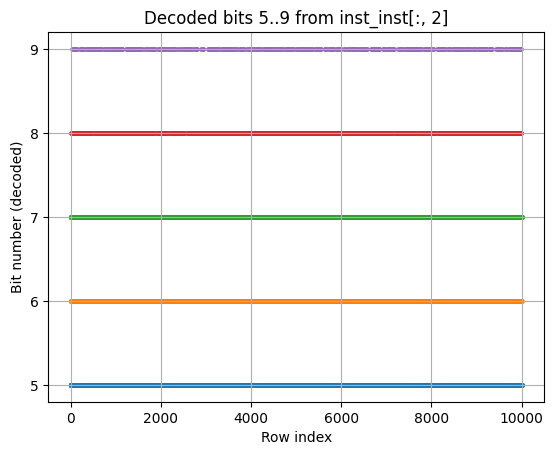

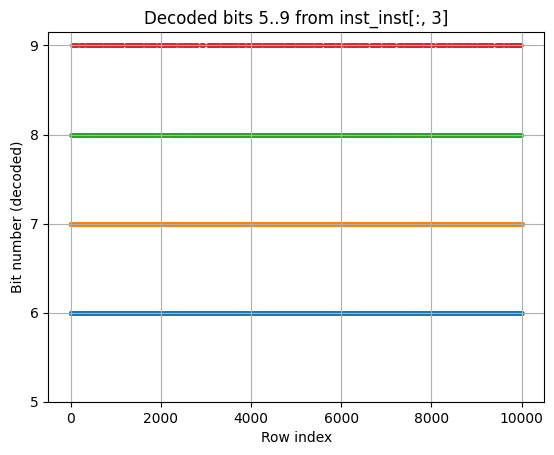

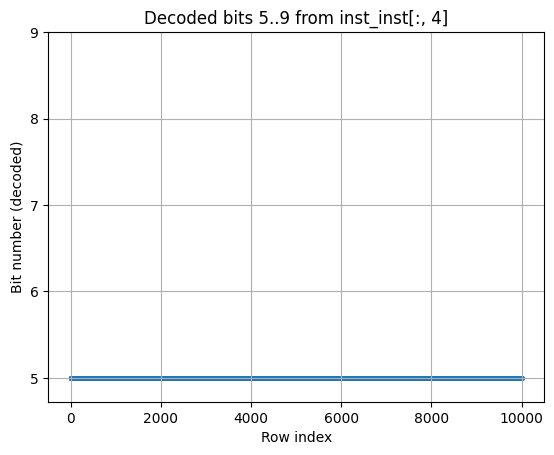

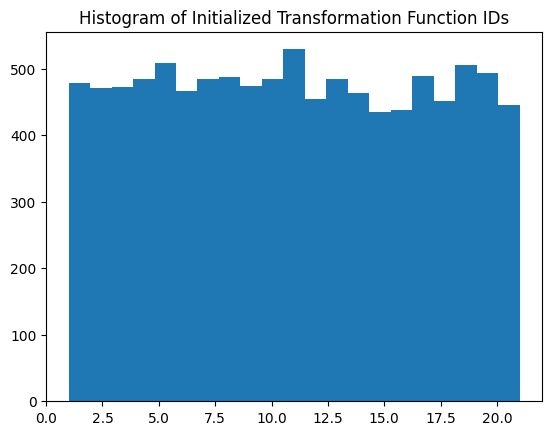

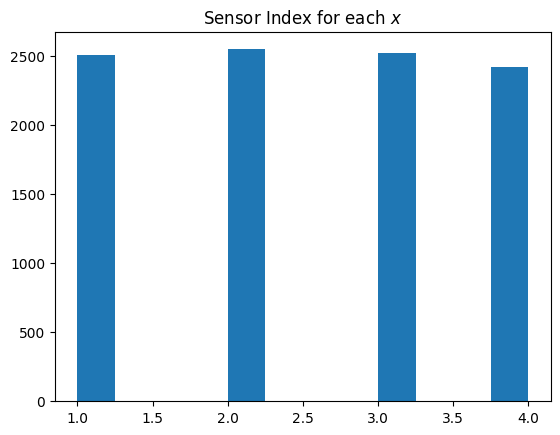

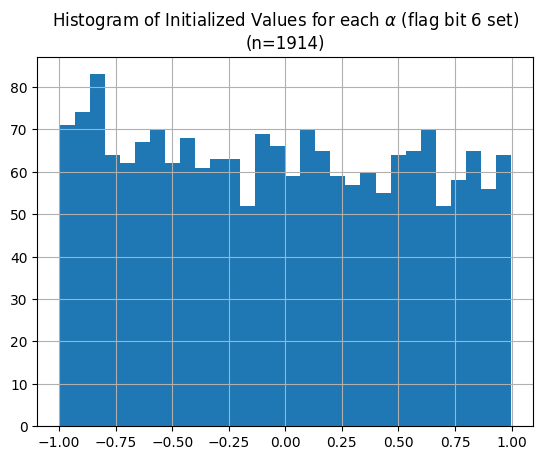

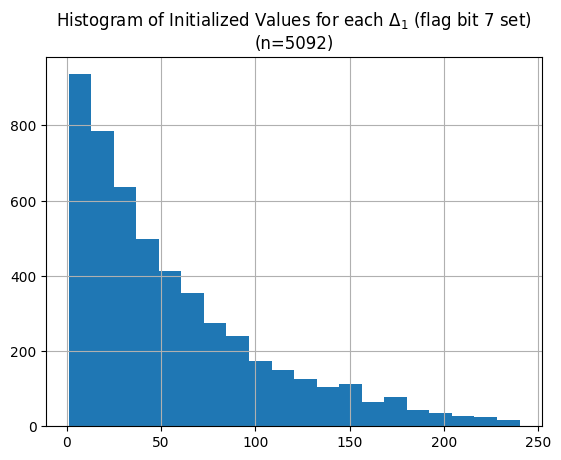

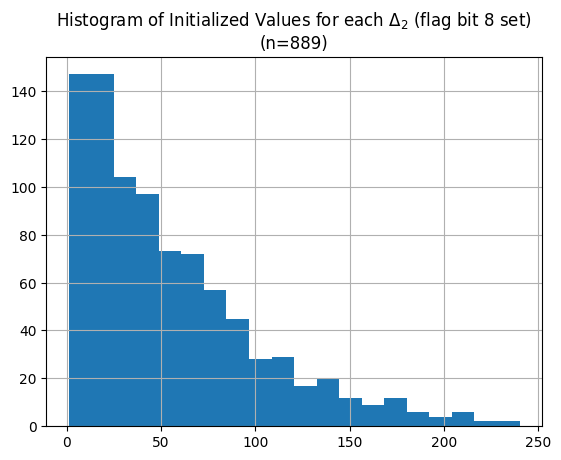

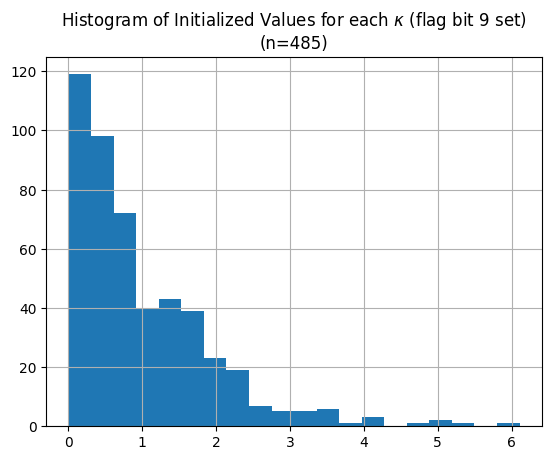

In [2]:
_V.plot_flags(inst_inst)
#format for instructions [pop_idx, func_id, USED_FLAGS, CONST_FLAGS, SENSOR_FLAGS, x, a, d, dd, k]

_V.plot_instruction_demo(inst_inst)